# Pymaceuticals Inc.
---

### Analysis

- Average tumor size has a strong correlation to mouse weight (r = 0.951), which means that heavier mice tend to have larger tumors, on average. This is displayed in the scatter plots at the bottom.
- Capomulin was effective at reducing the size of tumors over time, as evidenced by the line graph of Tumor Volume Vs. Timpoint below.
- Infubinol and Ceftamin had higher final tumor volumes than Capomulin and Ramicane, as evidenced by the box plots below
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = "right", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [2]:
# Checking the number of mice.
#total_mice = mouse_metadata["Mouse ID"].count()
total_mice = combined_df["Mouse ID"].nunique()
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combined_df[combined_df.duplicated()]["Mouse ID"]
duplicate_mouse_id

137    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_df[combined_df["Mouse ID"].str.contains('g989')]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[~(combined_df.duplicated(subset="Mouse ID", keep=False) & combined_df["Mouse ID"].eq("g989"))].copy() #note .copy() is to remove errors 
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = clean_df["Mouse ID"].nunique()
total_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

In [8]:
mean_tumor_volume = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean_tumor_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
median_tumor_volume = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median_tumor_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
tumor_volume_variance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_volume_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [11]:
tumor_volume_stddev = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_volume_stddev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [12]:
tumor_volume_sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_volume_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [13]:
###### NOTE: Calculations shown above^^ ####

# Assemble the resulting (groupby) series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume":mean_tumor_volume,
    "Median Tumor Volume":median_tumor_volume,
    "Tumor Volume Variance":tumor_volume_variance,
    "Tumor Volume Std. Dev.":tumor_volume_stddev,
    "Tumor Volume Std. Err.":tumor_volume_sem
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_agg = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [16]:
#for reference
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [17]:
mice_tested_per_drug = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_tested_per_drug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [18]:
drug_regimens = clean_df["Drug Regimen"].unique()
drug_regimens.sort() #needed in order to get the correct axis entries for pyplot
drug_regimens

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

Text(0, 0.5, 'Number of Mice Tested')

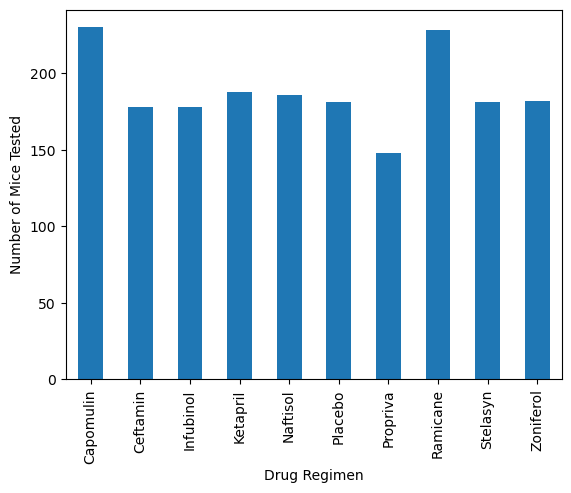

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
panda_plot = mice_tested_per_drug.plot.bar()
panda_plot.set_xlabel("Drug Regimen")
panda_plot.set_ylabel("Number of Mice Tested")

Text(0, 0.5, 'Number of Mice Tested')

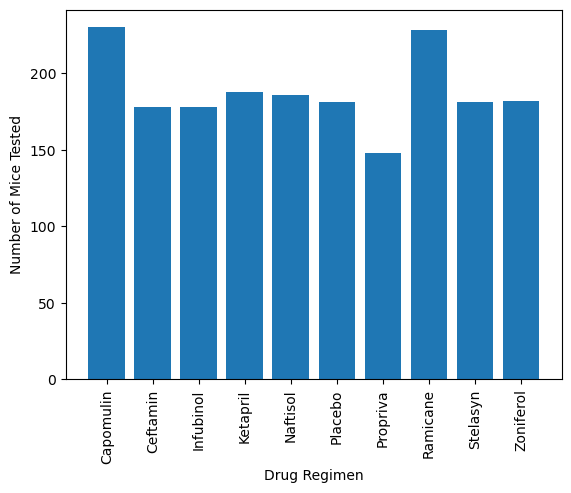

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
## pyplot bar chart ##
x_axis = np.arange(len(mice_tested_per_drug))
plt.bar(x_axis, mice_tested_per_drug, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimens , rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = clean_df["Sex"]
plot_data = sex_df.value_counts("Male")
plot_data

Male      0.509574
Female    0.490426
Name: Sex, dtype: float64

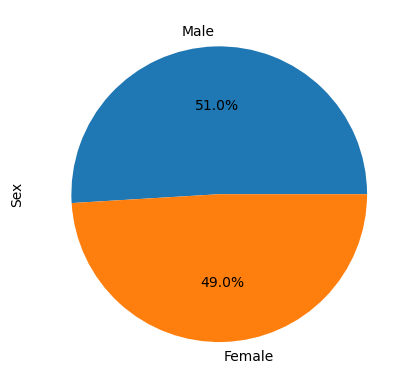

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
panda_pie_plot = plot_data.plot.pie(autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

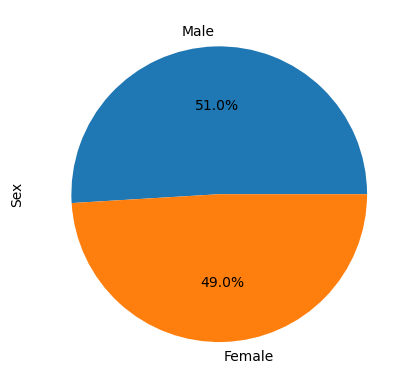

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(plot_data, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints_per_MouseID = clean_df[(clean_df["Timepoint"] == 45)]
final_timepoints_per_MouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1763,n364,Ramicane,Male,4,17,45,31.095335,1
1764,b128,Capomulin,Female,9,22,45,38.982878,2
1765,l661,Ceftamin,Male,18,26,45,59.851956,3
1766,y865,Ceftamin,Male,23,26,45,64.729837,3
1767,y769,Ceftamin,Female,6,27,45,68.594745,4
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [34]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [36]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_final = pd.merge(clean_df, final_timepoints_per_MouseID)
clean_final.set_index('Mouse ID')

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
n364,Ramicane,Male,4,17,45,31.095335,1
b128,Capomulin,Female,9,22,45,38.982878,2
l661,Ceftamin,Male,18,26,45,59.851956,3
y865,Ceftamin,Male,23,26,45,64.729837,3
y769,Ceftamin,Female,6,27,45,68.594745,4
...,...,...,...,...,...,...,...
r944,Capomulin,Male,12,25,45,41.581521,2
u364,Capomulin,Male,18,17,45,31.023923,3
p438,Ceftamin,Female,11,26,45,61.433892,1


In [37]:
capomulin_final = clean_final[clean_final["Drug Regimen"] == "Capomulin"]
capomulin_final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,b128,Capomulin,Female,9,22,45,38.982878,2
6,t565,Capomulin,Female,20,17,45,34.455298,0
8,l509,Capomulin,Male,17,21,45,41.483008,3
14,g288,Capomulin,Male,3,19,45,37.074024,1
25,r554,Capomulin,Female,8,17,45,32.377357,3
28,g316,Capomulin,Female,22,22,45,40.159220,2
34,y793,Capomulin,Male,17,17,45,31.896238,2
37,m957,Capomulin,Female,3,19,45,33.329098,1
54,l897,Capomulin,Male,17,19,45,38.846876,1
58,v923,Capomulin,Female,19,21,45,40.658124,2


In [38]:
capomulin_final = clean_final[clean_final["Drug Regimen"] == "Capomulin"]
capomulin_volume = capomulin_final["Tumor Volume (mm3)"]
capomulin_volume

1      38.982878
6      34.455298
8      41.483008
14     37.074024
25     32.377357
28     40.159220
34     31.896238
37     33.329098
54     38.846876
58     40.658124
66     38.939633
75     36.041047
80     28.430964
83     28.484033
86     23.343598
87     37.311846
91     40.728578
96     38.125164
115    47.685963
125    41.581521
126    31.023923
Name: Tumor Volume (mm3), dtype: float64

In [39]:
#capomulin final tumor volumes
capomulin_final = clean_final[clean_final["Drug Regimen"] == "Capomulin"].set_index('Mouse ID')
capomulin_volume = capomulin_final["Tumor Volume (mm3)"]
capomulin_volume

Mouse ID
b128    38.982878
t565    34.455298
l509    41.483008
g288    37.074024
r554    32.377357
g316    40.159220
y793    31.896238
m957    33.329098
l897    38.846876
v923    40.658124
b742    38.939633
w914    36.041047
m601    28.430964
x401    28.484033
s185    23.343598
i738    37.311846
s710    40.728578
j119    38.125164
i557    47.685963
r944    41.581521
u364    31.023923
Name: Tumor Volume (mm3), dtype: float64

In [40]:
ramicane_final = clean_final[clean_final["Drug Regimen"] == "Ramicane"]
ramicane_volume = ramicane_final["Tumor Volume (mm3)"]
ramicane_volume

0      31.095335
10     38.407618
13     45.220869
17     36.374510
32     30.276232
36     30.638696
38     40.659006
45     30.564625
51     22.050126
59     33.397653
65     36.134852
70     31.560470
73     43.047543
81     37.311236
94     38.810366
104    40.667713
107    29.128472
111    37.225650
116    32.978522
122    33.562402
Name: Tumor Volume (mm3), dtype: float64

In [41]:
#ramicane final tumor volumes
ramicane_final = clean_final[clean_final["Drug Regimen"] == "Ramicane"].set_index('Mouse ID')
ramicane_volume = ramicane_final["Tumor Volume (mm3)"]
ramicane_volume

Mouse ID
n364    31.095335
a411    38.407618
q597    45.220869
i334    36.374510
s508    30.276232
z578    30.638696
e662    40.659006
m546    30.564625
k403    22.050126
c758    33.397653
j989    36.134852
j913    31.560470
a444    43.047543
d251    37.311236
a520    38.810366
u196    40.667713
g791    29.128472
r811    37.225650
a644    32.978522
i177    33.562402
Name: Tumor Volume (mm3), dtype: float64

In [42]:
infubinol_final = clean_final[clean_final["Drug Regimen"] == "Infubinol"]
infubinol_volume = infubinol_final["Tumor Volume (mm3)"]
infubinol_volume

16    67.685569
18    72.226731
21    62.754451
23    65.525743
26    66.196912
31    66.083066
39    62.435404
41    67.973419
43    60.918767
Name: Tumor Volume (mm3), dtype: float64

In [43]:
#infubinol final tumor volumes
infubinol_final = clean_final[clean_final["Drug Regimen"] == "Infubinol"].set_index('Mouse ID')
infubinol_volume = infubinol_final["Tumor Volume (mm3)"]
infubinol_volume

Mouse ID
y163    67.685569
c139    72.226731
z581    62.754451
a251    65.525743
k483    66.196912
a685    66.083066
e476    62.435404
a203    67.973419
f345    60.918767
Name: Tumor Volume (mm3), dtype: float64

In [44]:
#ceftamin final tumor volumes
ceftamin_final = clean_final[clean_final["Drug Regimen"] == "Ceftamin"]
ceftamin_volume = ceftamin_final["Tumor Volume (mm3)"]
ceftamin_volume

2      59.851956
3      64.729837
4      68.594745
9      61.849023
27     67.527482
47     67.748662
92     64.634949
93     62.999356
95     68.923185
99     61.386660
101    64.299830
109    59.741901
127    61.433892
Name: Tumor Volume (mm3), dtype: float64

In [45]:
#ceftamin final tumor volumes
ceftamin_final = clean_final[clean_final["Drug Regimen"] == "Ceftamin"].set_index('Mouse ID')
ceftamin_volume = ceftamin_final["Tumor Volume (mm3)"]
ceftamin_volume

Mouse ID
l661    59.851956
y865    64.729837
y769    68.594745
j296    61.849023
w151    67.527482
l471    67.748662
x581    64.634949
a275    62.999356
k210    68.923185
x822    61.386660
l733    64.299830
o287    59.741901
p438    61.433892
Name: Tumor Volume (mm3), dtype: float64

In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
capomulin_quartiles = capomulin_volume.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[.25]
capomulin_upperq = capomulin_quartiles[.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

ramicane_quartiles = ramicane_volume.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_upperq = ramicane_quartiles[.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

infubinol_quartiles = infubinol_volume.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_upperq = infubinol_quartiles[.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

ceftamin_quartiles = ceftamin_volume.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_upperq = ceftamin_quartiles[.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

print(f"Capomulin IQR: {capomulin_iqr}")
print(f"Capomulin values below: {capomulin_lower_bound} could be outliers")
print(f"Capomulin values above: {capomulin_upper_bound} could be outliers")
print(f"Ramicane IQR: {ramicane_iqr}")
print(f"Ramicane values below: {ramicane_lower_bound} could be outliers")
print(f"Ramicane values above: {ramicane_upper_bound} could be outliers")
print(f"Infubinol IQR: {infubinol_iqr}")
print(f"Infubinol values below: {infubinol_lower_bound} could be outliers")
print(f"Infubinol values above: {infubinol_upper_bound} could be outliers")
print(f"Ceftamin IQR: {ceftamin_iqr}")
print(f"Ceftamin values below: {ceftamin_lower_bound} could be outliers")
print(f"Ceftamin values above: {ceftamin_upper_bound} could be outliers")

    

Capomulin IQR: 7.781863460000004
Capomulin values below: 20.70456164999999 could be outliers
Capomulin values above: 51.83201549 could be outliers
Ramicane IQR: 7.527130082500001
Ramicane values below: 19.69048010125 could be outliers
Ramicane values above: 49.79900043125001 could be outliers
Infubinol IQR: 4.9311172099999965
Infubinol values below: 55.35777559500001 could be outliers
Infubinol values above: 75.08224443499999 could be outliers
Ceftamin IQR: 6.093590140000003
Ceftamin values below: 52.29350701999999 could be outliers
Ceftamin values above: 76.66786758 could be outliers


In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#create lists of each drug's final tumor volume
capomulin_box = list(capomulin_volume)
ramicane_box = list(ramicane_volume)
infubinol_box = list(infubinol_volume)
ceftamin_box = list(ceftamin_volume)

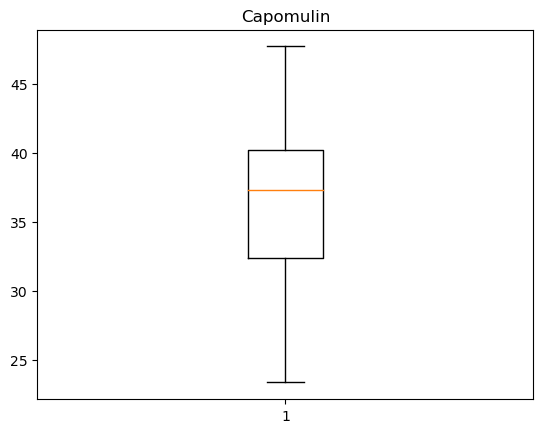

In [48]:
#Capomulin Boxplot
fig1, ax1 = plt.subplots()
ax1.set_title("Capomulin")
ax1.set_label('Final Tumor Volune (mm3)')
ax1.boxplot(capomulin_box)
plt.show()

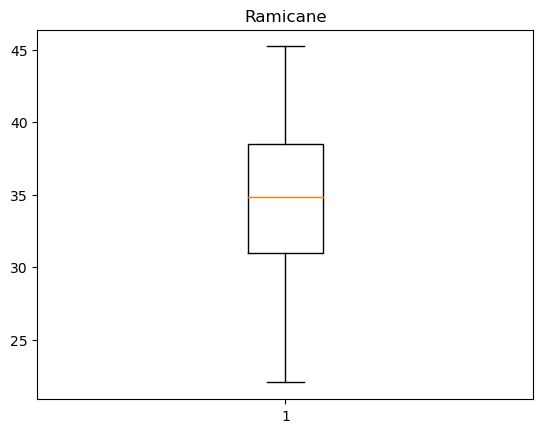

In [49]:
#Ramicane Boxplot
fig2, ax2 = plt.subplots()
ax2.set_title("Ramicane")
ax2.set_label('Final Tumor Volune (mm3)')
ax2.boxplot(ramicane_box)
plt.show()

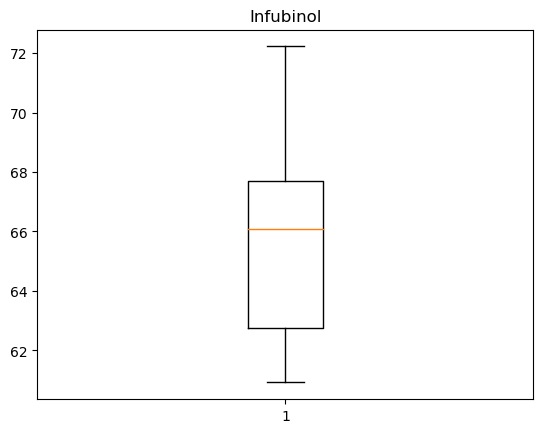

In [50]:
#Infubinol Boxplot
fig3, ax3 = plt.subplots()
ax3.set_title("Infubinol")
ax3.set_label('Final Tumor Volune (mm3)')
ax3.boxplot(infubinol_box)
plt.show()

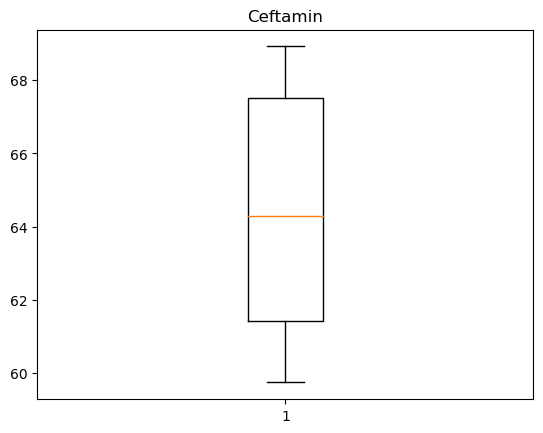

In [51]:
#Ceftamin Boxplot
fig4, ax4 = plt.subplots()
ax4.set_title("Ceftamin")
ax4.set_label('Final Tumor Volune (mm3)')
ax4.boxplot(ceftamin_box)
plt.show()

[Text(1, 0, 'Capomuln'),
 Text(2, 0, 'Ramicane'),
 Text(3, 0, 'Infubinol'),
 Text(4, 0, 'Ceftamin')]

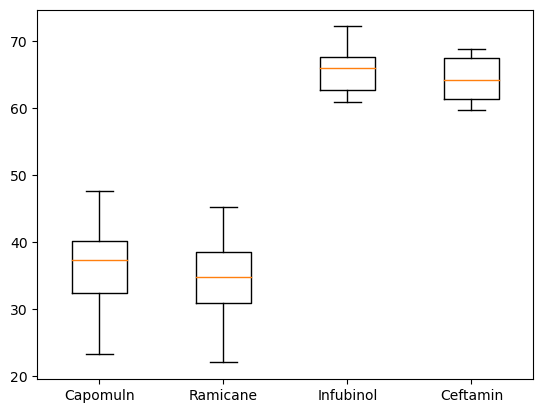

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#Combined Boxplot
box_dict = {'Capomuln' : capomulin_box,'Ramicane': ramicane_box, 'Infubinol': infubinol_box ,'Ceftamin':ceftamin_box}

fig, ax = plt.subplots()
ax.boxplot(box_dict.values())
ax.set_xticklabels(box_dict.keys())

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

##work shown below

In [53]:
#for reference
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [54]:
#capomulin specific df
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
226,j246,Capomulin,Female,21,21,0,45.000000,0
227,r554,Capomulin,Female,8,17,0,45.000000,0
228,s185,Capomulin,Female,3,17,0,45.000000,0
229,b742,Capomulin,Male,7,21,0,45.000000,0
...,...,...,...,...,...,...,...,...
1854,s710,Capomulin,Female,1,23,45,40.728578,1
1859,j119,Capomulin,Female,7,23,45,38.125164,1
1878,i557,Capomulin,Female,1,24,45,47.685963,1
1888,r944,Capomulin,Male,12,25,45,41.581521,2


In [55]:
#choose a mouse and display it's data
mouse_b128_tumor_over_time = capomulin_df[capomulin_df['Mouse ID']  == 'b128']
mouse_b128_tumor_over_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
472,b128,Capomulin,Female,9,22,5,45.651331,0
679,b128,Capomulin,Female,9,22,10,43.270852,0
719,b128,Capomulin,Female,9,22,15,43.784893,0
933,b128,Capomulin,Female,9,22,20,42.731552,0
1268,b128,Capomulin,Female,9,22,25,43.262145,1
1400,b128,Capomulin,Female,9,22,30,40.605335,1
1547,b128,Capomulin,Female,9,22,35,37.967644,1
1629,b128,Capomulin,Female,9,22,40,38.379726,2
1764,b128,Capomulin,Female,9,22,45,38.982878,2


In [56]:
#define x axis for line plot
x_axis_data = list(mouse_b128_tumor_over_time['Timepoint'])
x_axis_data

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [57]:
#define y axis for line plot
y_axis_data = list(mouse_b128_tumor_over_time['Tumor Volume (mm3)'])
y_axis_data

[45.0,
 45.65133131,
 43.2708519,
 43.78489343,
 42.731552,
 43.26214483,
 40.60533486,
 37.96764437,
 38.3797259,
 38.98287774]

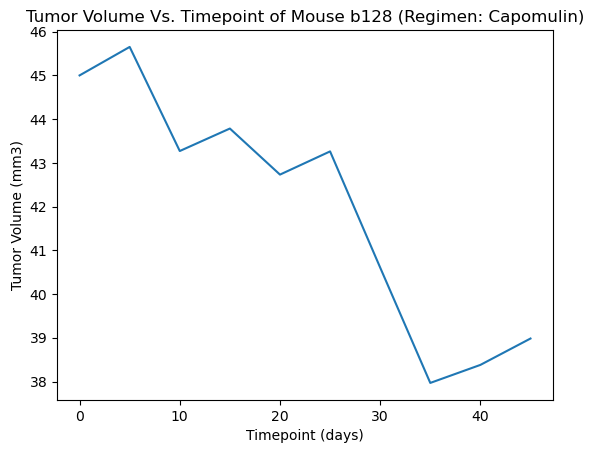

In [60]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(x_axis_data,y_axis_data)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Vs. Timepoint of Mouse b128 (Regimen: Capomulin)')
plt.show()

In [61]:
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
226,j246,Capomulin,Female,21,21,0,45.000000,0
227,r554,Capomulin,Female,8,17,0,45.000000,0
228,s185,Capomulin,Female,3,17,0,45.000000,0
229,b742,Capomulin,Male,7,21,0,45.000000,0
...,...,...,...,...,...,...,...,...
1854,s710,Capomulin,Female,1,23,45,40.728578,1
1859,j119,Capomulin,Female,7,23,45,38.125164,1
1878,i557,Capomulin,Female,1,24,45,47.685963,1
1888,r944,Capomulin,Male,12,25,45,41.581521,2


In [66]:
average_tumor_vol_capomulin = capomulin_df.groupby(['Weight (g)']).mean()['Tumor Volume (mm3)']
average_tumor_vol_capomulin

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

In [67]:
x_axis_vals = average_tumor_vol_capomulin.keys()
x_axis_vals

Int64Index([15, 17, 19, 20, 21, 22, 23, 24, 25], dtype='int64', name='Weight (g)')

In [69]:
y_axis_vals = list(average_tumor_vol_capomulin)
y_axis_vals

[36.182039562,
 37.21413250092308,
 41.182391363,
 39.14105275,
 42.08870003395833,
 43.288489764999994,
 43.34105084869565,
 44.805809685,
 44.06210875428571]

Text(0, 0.5, 'Average Tumor Volume (mm3)')

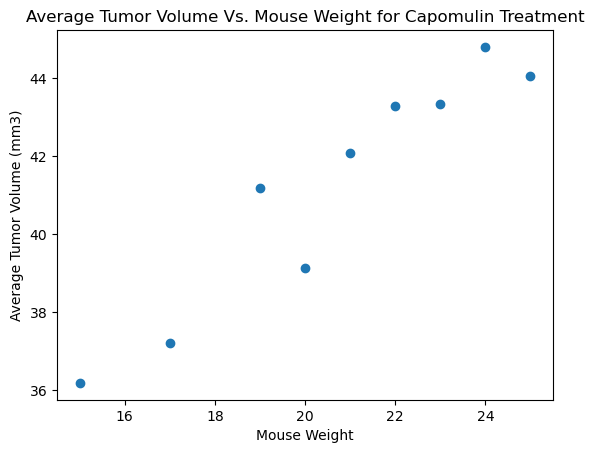

In [72]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(x_axis_vals, y_axis_vals, marker="o")
plt.title("Average Tumor Volume Vs. Mouse Weight for Capomulin Treatment")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [73]:
#import dependencies
from scipy.stats import linregress

The r-value is:0.9505243961855268


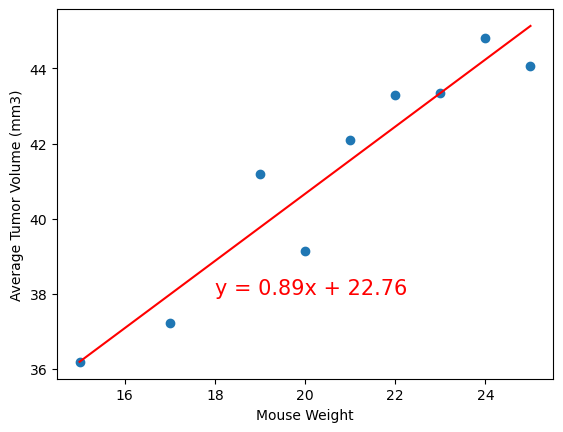

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_vals, y_axis_vals)
regress_values = x_axis_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_vals,y_axis_vals)
plt.plot(x_axis_vals,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-value is:{rvalue}")
plt.show()